# TUGAS KLASIFIKASI DATA PROYEK SAINS DATA - B

Nama  : Indah Pratiwi    
NIM   : 210411100050  
Kelas : B  

## BUSSINESS UNDERSTANDING
---

### **Identifikasi kasus** :

Diabetes adalah salah satu penyakit kronis paling umum di Amerika Serikat, yang berdampak pada jutaan orang Amerika setiap tahunnya dan memberikan beban keuangan yang signifikan terhadap perekonomian. Pusat Pengendalian dan Pencegahan Penyakit menunjukkan bahwa pada tahun 2018, 34,2 juta orang Amerika menderita diabetes dan 88 juta menderita pradiabetes Diabetes umumnya ditandai dengan tubuh tidak memproduksi cukup insulin atau tidak mampu menggunakan insulin yang dibuat seefektif yang dibutuhkan.

### **Tujuan Proyek** : 

Membangun model klasifikasi diabetes terbaik sebagai upaya deteksi dini terhadap penyakit diabetes menggunakan Model Support Vector Machine. Dengan menganalisa kumpulan data kasus diabetes, model ini akan mempelajari pola agar dapat membangun prediksi yang akurat sehingga memungkinkan tenaga kesehatan profesional untuk mengidentifikasi pasien diabetes.

## DATA UNDERSTANDING
---

Tahap Data Understanding merupakan tahap dimana kita perlu memahami data yang akan diolah. Adapun hal - hal yang perlu dilakukan nantinya untuk memahami dataset ini, yakni
1. Tentang data, mencakup :
    * Pengumpulan dataset
    * Pengenalan singkat mengenai data yang akan diolah
2. Mendeskripsikan data, mencakup :
    * analisa tipe data
    * deskripsi fitur
3. Eksplorasi data, mencakup :
    * Visualisasi data
    * Skoring fitur
4. Identifikasi kualitas data :
    * Identifikasi missing valye setiap fitur atau kolom
    * Identifikasi data duplikat
    * Identifikasi outlier (data aneh)
    * Identifikasi jumlah data (proporsi data perkelas -untuk mengetahui balancing dataset atau keseimbangan data per kelas)

### **About Data -----------------------------------------------------------------------------------------------------------------------------**

#### **Pengumpulan Dataset**

Untuk proyek ini, digunakan csv dari kumpulan data yang tersedia di Kaggle untuk tahun 2015. Fitur-fitur ini berupa pertanyaan yang diajukan langsung kepada peserta, atau variabel yang dihitung berdasarkan tanggapan masing-masing peserta. Dataset ini berisi kumpulan tanggapan dari lebih dari 400.000 orang Amerika mengenai perilaku berisiko terkait kesehatan, kondisi kesehatan kronis, dan penggunaan layanan pencegahan di setiap tahun. Hal ini telah dilakukan setiap tahun sejak tahun 1984. Survei dilakukan oleh CDC setiap tahun dengan menggunakan metode BRFSS. Sistem Pengawasan Faktor Risiko Perilaku (BRFSS) adalah survei telepon terkait kesehatan yang dikumpulkan setiap tahun oleh CDC. 


  
Referensi data bisa diakses [disini](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

In [1]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### **Seputar dataset**

In [2]:
print("Banyaknya data : ", data.shape[0])

Banyaknya data :  253680


Dataset ini memiliki 253680 data dengan rincian pelabelan sebagai berikut :  
<table>
    <tr>
    <td>Label</td>
    <td>Meaning</td>
    <td>Total</td>
    </tr>
    <tr>
    <td>0.0</td>
    <td>Tidak Diabetes</td>
    <td>213703 data</td>
    </tr>
    <tr>
    <td>1.0</td>
    <td>Prediabetes</td>
    <td>4631</td>
    </tr>
    <tr>
    <td>2.0</td>
    <td>Diabetes</td>
    <td>35356</td>
    </tr>
</table>

Terjadi perbedaan yang signifikan pada jumlah data antar label sehingga perlu diseimbangkan terlebih dahulu

#### **Ciri yang tersedia sebagai acuan dalam mengklasifikasi diabetes**

In [3]:
print("Banyaknya kolom : ", data.shape[1])

Banyaknya kolom :  22


**Untuk mendeteksi diabetes masyarakat Amerika, dapat dilihat dari ciri-ciri sebagai berikut :**
1. `Diabetes_binary (label)` : jenis diabetes
2. `HighBP (tekanan darah)` : Apakah anda mempunyai tekanan darah tinggi?
3. `HighChol (kolesterol)` : Apakah anda mengidap kolesterol?
4. `Cholcheck (cek kolesterol)/5tahun` : Apakah dalam 5 tahun terakhir anda pernah cek gula darah?
5. `BMI (Body Mass Index)` : perkiraan lemak tubuh yang didasarkan pada berat dan tinggi badan. Rumusnya sebagai berikut.  
$$ BMI = \frac{berat badan (kg)}{tinggi badan (m^2)} $$

6. `Smoker (perokok)` : Apakah anda merokok? Setidaknya 100 batang selama hidup.
7. `Stroke` : Apakah anda punya riwayat penyakit stroke?
8. `HeartDiseaseorAttack (penyakit jantung)` : Apakah anda punya riwayat penyakit jantung? Baik penyakit jantung koroner akut atau serangan jantung.
9. `PhysActivity (riwayat aktivitas)` : Apakah anda sering beraktivitas dalam 30 hari terakhir (tidak termasuk pekerjaan) ?
10. `Fruits (konsumsi buah/hari)` : Apakah anda mengonsumsi satu atau lebih buah setiap hari?
11. `Veggies (konsumsi sayur/hari)` : Apakah anda mengonsumsi satu atau lebih sayur setiap hari?
12. `HvyAlcoholConsump (konsumsi alkohol)` : Apakah anda mengonsumsi alkohol? (Untuk laki laki dewasa : 14 gelas per minggu dan perempuan dewasa : 7 gelas per minggu)
13. `AnyHealthcare (memiliki layanan kesehatan)` : Apakah anda memiliki cakupan layanan kesehatan? Contohnya asuransi kesehatan, dan lainnya.
14. `NoDocbcCost (perlu ke dokter namun terhalang biaya)` : Apakah dalam 12 bulan terakhir ini anda perlu ke dokter tetapi tidak bisa karena biaya?
15. `GenHlth (range kesehatan diri sendiri)`
16. `MentHlth (kesehatan mental)` : Bagaimana kondisi mental anda dalam 30 hari terakhir? Meliputi stres, depresi dan masalah dengan emosi.
17. `PhysHlth (kesehatan fisik)` : Bagaimana kesehatan fisik anda dalam 30 hari terakhir? Mecakup penyakit dan cedera fisik.
18. `Diffwalk (kesulitan berjalan atau menaiki tangga)` : Apakah anda memiliki kesulitas untuk berjalan atau menaiki tangga?
19. `Sex (jenis kelamin)`
20. `Age (usia)`
21. `Education (tingkat pendidikan)`
22. `Income (penghasilan)`

### **Mendeskripsikan Data -----------------------------------------------------------------------------------------------------------------**

In [4]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#### **Analisa Tipe data**

Dalam analisa data, terdapat beberapa tipe data yang sering ditemukan. Pemahaman tipe data ini penting karena berbagai jenis analisis statistik dan pemrosesan data dapat memerlukan pendekatan yang berbeda tergantung pada jenis data yang digunakan. Misalnya, untuk data ordinal, metode pengurutan dan perbandingan tingkat mungkin lebih tepat daripada untuk data nominal. Sedangkan untuk data interval dan rasio, operasi matematika seperti penambahan, pengurangan, dan perbandingan proporsi bisa diterapkan

**Berikut Macam - Macam Data yang ada pada data ini.**   

1. Tipe nominal adalah kategori di mana data tidak memiliki urutan atau tingkatan tertentu.    
    - memiliki value 1 yang melambangkan ya dan 0 yang melambangkan tidak.
        > Pada data ini mencakup fitur : *'HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'* 
    - memiliki value perempuan dan laki laki.
        > yakni pada fitur *'Sex'*
2. Tipe rentang atau rasio 
    > yakni pada fitur *'MentHlth', 'PhysHlth', 'GenHlth', 'Age' dan 'Income'*
3. Tipe interval
    > yakni pada fitur *'BMI'*
4. Tipe ordinal adalah kategori dimana data memiliki nilai-nilai yang memiliki urutan atau tingkatan tetapi selisih antara nilai-nilainya tidak memiliki interpretasi yang bermakna atau seragam.
    > yakni pada fitur *'Education'*

#### **Deskripsi Fitur**

1. `Diabetes_binary (label)` : jenis - jenis pelabelan diabetes
   
   > 0 : no diabetes  
   > 1 : prediabetes  
   > 2 : diabetes

2. `HighBP (tekanan darah)` : Apakah anda mempunyai tekanan darah tinggi?

   > 0 : tidak  
   > 1 : tinggi

3. `HighChol (kolesterol)` : Apakah anda mengidap kolesterol?

   > 0 : tidak  
   > 1 : tinggi

4. `Cholcheck (cek kolesterol)/5tahun` : Apakah dalam 5 tahun terakhir anda pernah cek gula darah?

   > 0 : tidak  
   > 1 : ya

5. `BMI (Body Mass Index)` : perkiraan lemak tubuh yang didasarkan pada berat dan tinggi badan
    
6. `Smoker (perokok)` : Apakah anda merokok? Setidaknya 100 batang selama hidup.

   > 0 : tidak  
   > 1 : ya

7. `Stroke` : Apakah anda punya riwayat penyakit stroke?

   > 0 : tidak  
   > 1 : ya

8. `HeartDiseaseorAttack (penyakit jantung)` : Apakah anda punya riwayat penyakit jantung? Baik penyakit jantung koroner akut atau serangan jantung.

   > 0 : tidak  
   > 1 : ya


9. `PhysActivity (riwayat aktivitas)` : Apakah anda sering beraktivitas dalam 30 hari terakhir (tidak termasuk pekerjaan) ?

   > 0 : tidak  
   > 1 : ya

10. `Fruits (konsumsi buah/hari)` : Apakah anda mengonsumsi satu atau lebih buah setiap hari?

      > 0 : tidak  
      > 1 : ya

11. `Veggies (konsumsi sayur/hari)` : Apakah anda mengonsumsi satu atau lebih sayur setiap hari?

      > 0 : tidak  
      > 1 : ya

12. `HvyAlcoholConsump (konsumsi alkohol)` : Apakah anda mengonsumsi alkohol? (Untuk laki laki dewasa : 14 gelas per minggu dan perempuan dewasa : 7 gelas per minggu)

      > 0 : tidak  
      > 1 : ya

13. `AnyHealthcare (memiliki layanan kesehatan)` : Apakah anda memiliki cakupan layanan kesehatan? Contohnya asuransi kesehatan, dan lainnya.

      > 0 : tidak  
      > 1 : ya

14. `NoDocbcCost (perlu ke dokter namun terhalang biaya)` : Apakah dalam 12 bulan terakhir ini anda perlu ke dokter tetapi tidak bisa karena biaya?

      > 0 : tidak  
      > 1 : ya

15. `GenHlth (range kesehatan diri sendiri)`

      > 1 : excellent : sangat baik sekali  
      > 2 : very good : sangat baik  
      > 3 : good : baik  
      > 4 : fair : cukup  
      > 5 : poor : buruk  

16. `MentHlth (kesehatan mental)` : Bagaimana kondisi mental anda dalam 30 hari terakhir? Meliputi stres, depresi dan masalah dengan emosi.

17. `PhysHlth (kesehatan fisik)` : Bagaimana kesehatan fisik anda dalam 30 hari terakhir? Mecakup penyakit dan cedera fisik.

18. `Diffwalk (kesulitan berjalan atau menaiki tangga)` : Apakah anda memiliki kesulitas untuk berjalan atau menaiki tangga?

      > 0 : tidak  
      > 1 : ya

19. `Sex (jenis kelamin)`

      > 0 : perempuan  
      > 1 : laki - laki

20. `Age (usia)`

      > 1 : 18 - 24  
      > ...  
      > 9 : 60 - 64  
      > ...  
      > 13 : >= 80

21. `Education (tingkat pendidikan)`

      > 1 : tidak bersekolah / TK  
      > 2 : kelas 1 - 8    
      > ...

22. `Income (penghasilan)`

      >1 : <$10.000  
      >...  
      >5 : <$35.000  
      >...  
      >8 : >= 75.000

### **Eksplorasi Data -------------------------------------------------------------------------------------------------------------------------**

#### **Visualisasi Data**

Visualisasi data dilakukan untuk memudahkan kita memahami data. Melalui visualisasi data pula kita akan memperoleh informasi sebaran nilai dari dataset ini

<function matplotlib.pyplot.show(close=None, block=None)>

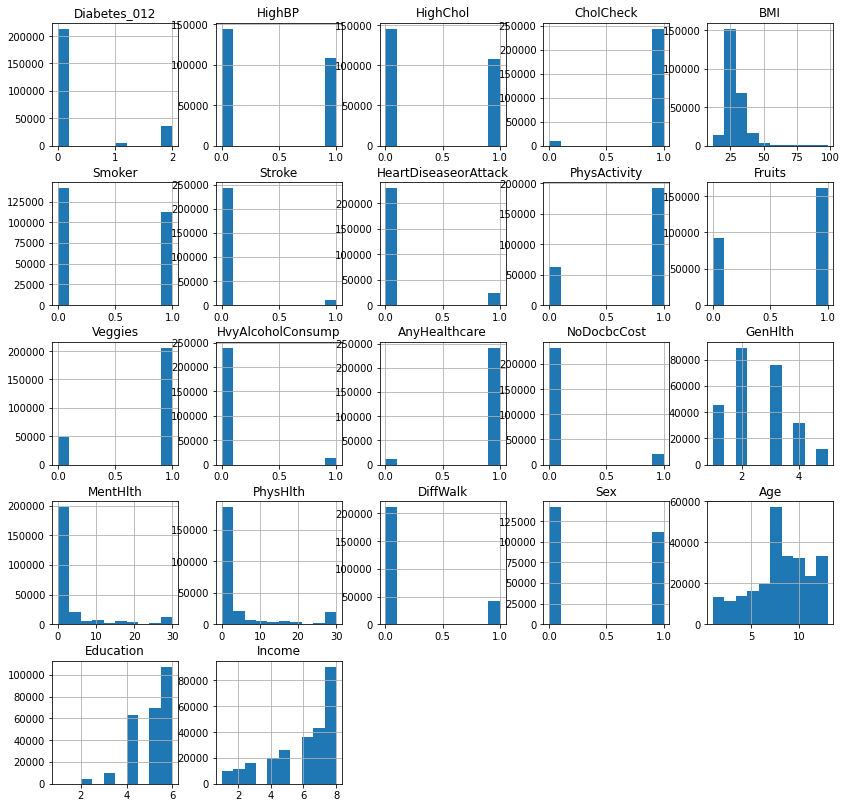

In [5]:
import matplotlib.pyplot as plt

data.hist(figsize=(14,14))
plt.show

#### **Skoring Fitur**

Dengan melakukan skoring fitur, kita akan mengetahui yang mana fitur yang penting dan yang tidak. Hal ini dikarenakan tidak semua fitur dapat dijadikan ciri untuk melakukan klasifikasi. Dengan menentukan beberapa ciri terbaik akan menghasilkan akurasi yang sama atau lebih baik dibandingkan dengan menggunakan semua ciri serta menghemat waktu komputasi.  

Skor informasi menggunakan *mutual_info_classif* berguna untuk mengevaluasi seberapa informatif suatu fitur terhadap variabel target. Skoring fitur menggunakan *mutual_info_classif* dapat mengukur seberapa banyak informasi dari variabel independen (fitur) yang terdapat pada variabel dependen (target) dalam dataset. Secara spesifik, skor ini menunjukkan seberapa banyak informasi dari suatu fitur yang dapat membantu dalam memprediksi target. **Semakin tinggi skornya, semakin informatif fitur tersebut terhadap variabel target.**

In [6]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# memisahkan kolom fitur dan target
fitur = data.drop(columns=['Diabetes_012'], axis =1)
target = data['Diabetes_012']

# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur, target)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")

Fitur 0: HighBP, Skor: 0.05561642060048522
Fitur 1: HighChol, Skor: 0.04080845417959589
Fitur 2: CholCheck, Skor: 0.04737894748629201
Fitur 3: BMI, Skor: 0.03291845338548338
Fitur 4: Smoker, Skor: 0.024555254743968025
Fitur 5: Stroke, Skor: 0.004573978879843121
Fitur 6: HeartDiseaseorAttack, Skor: 0.014765794164263157
Fitur 7: PhysActivity, Skor: 0.04840779338819412
Fitur 8: Fruits, Skor: 0.03944836922004358
Fitur 9: Veggies, Skor: 0.04057396831701987
Fitur 10: HvyAlcoholConsump, Skor: 0.0030044162205593583
Fitur 11: AnyHealthcare, Skor: 0.050059625630720195
Fitur 12: NoDocbcCost, Skor: 0.0003571847390562155
Fitur 13: GenHlth, Skor: 0.056215714817982265
Fitur 14: MentHlth, Skor: 0.003938005920602006
Fitur 15: PhysHlth, Skor: 0.014458343564895282
Fitur 16: DiffWalk, Skor: 0.02352030361344415
Fitur 17: Sex, Skor: 0.023150274174181584
Fitur 18: Age, Skor: 0.025031181390540613
Fitur 19: Education, Skor: 0.023418730412688715
Fitur 20: Income, Skor: 0.022843036373604964


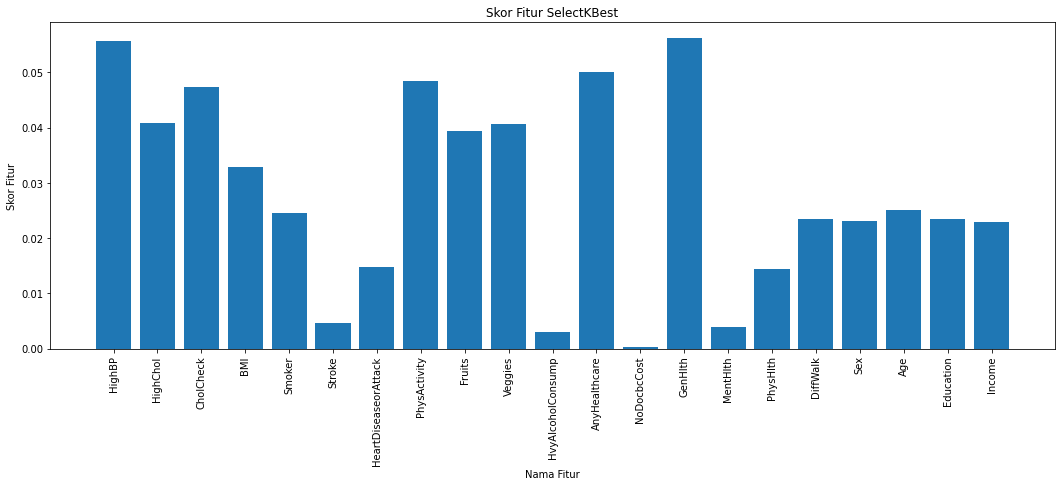

In [7]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
plt.xlabel("Nama Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
plt.xticks(rotation=90)
plt.show()

### **Mengidentifikasi Kualitas Data** --------------------------------------------------------------------------------------------------------

#### **Identifikasi missing value**

Missing Value adalah hilangnya satu atau beberapa data dalam suatu atribut. Berikut penyebab umum dari adanya *missing value*. 
1. Kesalahan manusia saat memasukkan data, contohnya penyalinan data yang tidak lengkap atau salah pengetikan
2. Terdapat beberapa pertanyaan tidak diisi oleh responden
3. Ketika data dihapus dan tidak diunduh dengan benar dari sumbernya
4. serta Tidak semua atribut sesuai dengan semua narasumber, contohnya atribut pendapat yang tidak relevan untuk siswa yang tidak bekerja

Penanganan Missing Value : Jika atribut tersebut memiliki banyak missing value, maka atribut tersebut perlu dihapus dari dataset. Namun jika hanya terdapat beberapa data yang missing value bisa dilakukan drop dari baris yang memiliki missing value atau mengisinya dengan rata - rata nilai pada atribut yang bersangkutan.   

Contoh adanya missing value :

<table>
    <tr>
    <td>fitur1</td>
    <td>fitur2</td>
    <td>fitur3</td>
    </tr>
    <tr>
    <td>1</td>
    <td>10</td>
    <td>5</td>
    </tr>
    <tr>
    <td></td>
    <td>12</td>
    <td>5</td>
    </tr>
    <tr>
    <td></td>
    <td>14</td>
    <td>5</td>
    </tr>
    <tr>
    <td>2</td>
    <td>16</td>
    <td>5</td>
    </tr>
    <tr>
    <td></td>
    <td>18</td>
    <td></td>
    </tr>
    <tr>
    <td></td>
    <td>20</td>
    <td>5</td>
    </tr>
</table>  

Dari tabel di atas fitur 1 memiliki banyak sekali missing value sehingga atribut fitur 1 perlu dihilangkan dan bisa dianggap tidak mencirikan data.   

Untuk melakukan pengecekan missing value, maka digunakan fungsi *isna()*

In [8]:
# mengecek apakah ada nilai yang hilang dalam setiap kolom
missing_values = data.isna().any()

# menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


Noted : tidak ada *missing value* pada data

#### **Identifikasi Duplikat Data**

Duplikat data merupakan suatu kondisi dimana suatu baris memiliki nilai yang sama persis di semua kolom pada baris lainnya. Adanya data yang redundan (berulang) dapat mengganggu hasil analisis dan menghasilkan akurasi yang tidak akurat. Untuk mengecek adanya duplikat data, maka digunakan fungsi *dupicated()*

In [9]:
jumlah_duplikat = data.duplicated().sum()

print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 23899


Note : terdapat puluhan ribu baris data yang sama, sehingga data tersebut harus dihilangkan untuk menghindari adanya data yang redundan.

#### **Identifikasi Outlier**

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data. Istilah outlier juga sering dikenal dengan nilai ekstrem serta tidak mencerminkan fenomena yang sebenarnya.  

Contoh :  
Di suatu sekolah A, biaya SPP ditetapkan berdasarkan gaji rata - rata orang tua masing - masing murid. Berikut rincian data yang diperoleh. 

<table>
    <tr>
    <td>Nama</td>
    <td>Penghasilan Orang Tua</td>
    </tr>
    <tr>
    <td>siswa 1</td>
    <td>Rp. 500.000</td>
    </tr>
    <tr>
    <td>siswa 2</td>
    <td>Rp. 750.000</td>
    </tr>
    <tr>
    <td>siswa 3</td>
    <td>Rp. 500.000</td>
    </tr>
    <td>siswa 4</td>
    <td>Rp. 450.000</td>
    <tr>
    <td>siswa 5</td>
    <td>Rp. 5.000.000</td>
    </tr>
</table>

Dari data tersebut ditemukan satu outlier yakni pada data siswa 5 yang mana penghasilan orangtuanya bisa mencapai Rp.5.000.000 per bulan. Jika penetapan biaya SPP tidak memperharikan outlier maka tiap siswa perlu membayar spp sebesar Rp. 1.440.000 yang tentu saja akan memberatkan semua siswa selain siswa 5.  


Untuk mengidentidikasi outlier, maka digunakan modul LOF (LocalOutlierFactor). LOF dipilih karena modul ini memungkinkan untuk menemukan titik-titik yang relatif jauh dari sebagian besar data lainnya, yang kemudian dianggap sebagai outlier.

In [10]:
from sklearn.neighbors import LocalOutlierFactor

# Menggunakan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5)
outlier_scores = lof.fit_predict(data)

outliers = data[outlier_scores == -1]
print("Banyaknya outlier : ", outliers.shape[0])

data_bersih = data[outlier_scores != -1]
print("Sisa data : ", data_bersih.shape[0])

Banyaknya outlier :  13616
Sisa data :  240064


Note : data memiliki belasan ribu outlier dan data tersebut perlu dihilangkan

#### **Identifikasi Jumlah Data**

Dengan mengetahui proporsi data untuk masing - masing label, kita bisa mengetahui seberapa berbeda jumlah data di tiap - tiap label. Jika jumlah data antar label memiliki perbedaan yang sangat jauh maka akan mempengaruhi akurasi serta hasil klasifikasi sehingga nantinya perlu dilakukan penyeimbangan jumlah data di tiap labelnya.

In [11]:
dataa = data['Diabetes_012'].value_counts()

print("Jumlah data pada tiap target :")
print(dataa)

Jumlah data pada tiap target :
0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


Note : terjadi ketimpangan data yang signifikan sehingga perlu dilakukan balancing data agar proporsi data tidak condong hanya pada satu atau kelas lainnya

### **Hasil Analisa Pada Data Understanding :**

1. Data tidak memiliki _missing values_
2. Data memiliki 23899 data redundan
3. Data memiliki 13616 outlier
4. Perbedaan jumlah atau proporsi data antar label sangat jauh
5. Hasil skoring fitur masih menggunakan data kotor sehingga perlu difilter kembali 

## DATA PREPROCESSING
---

Setelah memahami data, akan dilakukan tahap preprocessing untuk menangani masalah pada data yang sudah didefinisikan pada data understanding, yakni.
1. Menghapus Data Duplikat
2. Menghapus Outlier
3. Menyeimbangkan proporsi data tiap target

Setelah data siap, akan dilakukan skoring fitur kembali.

In [12]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [13]:
# Rincian dataset (banyak data dan kolom)

print("Banyaknya data : ", data.shape[0])
print("Banyaknya kolom : ", data.shape[1])

Banyaknya data :  253680
Banyaknya kolom :  22


### **Menghapus Data Duplikat**

Duplikat data merupakan suatu kondisi dimana suatu baris memiliki nilai yang sama persis di semua kolom pada baris lainnya. Adanya data yang redundan (berulang) dapat mengganggu hasil analisis dan menghasilkan akurasi yang tidak akurat.

Contoh : 

<table>
    <tr>
    <td>No.</td>
    <td>Berat Badan (kg)</td>
    <td>Tinggi Badan (cm)</td>
    <td>Usia</td>
    </tr>
    <tr>
    <td>1</td>
    <td>25</td>
    <td>150</td>
    <td>15</td>
    </tr>
    <tr>
    <td>2</td>
    <td>25</td>
    <td>100</td>
    <td>10</td>
    </tr>
    <tr>
    <td>3</td>
    <td>30</td>
    <td>125</td>
    <td>10</td>
    </tr>
    <tr>
    <td>4</td>
    <td>25</td>
    <td>150</td>
    <td>15</td>
    </tr>
</table>

Data pada baris ke 1 dan baris ke 4 memiliki value yang sama sehingga nantinya data pada baris ke 4 akan dihapus. Untuk menghapus data duplikat digunakan fungsi *drop_duplicates()*

In [14]:
# Menghapus data yang duplikat
data_bersih = data.drop_duplicates()

print("Banyaknya sisa data : ", data_bersih.shape[0])

Banyaknya sisa data :  229781


### **Menghapus Outlier**

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data. Istilah outlier juga sering dikenal dengan nilai ekstrem serta tidak mencerminkan fenomena yang sebenarnya.  

Contoh :  
Di suatu sekolah A, biaya SPP ditetapkan berdasarkan gaji rata - rata orang tua masing - masing murid. Berikut rincian data yang diperoleh. 

<table>
    <tr>
    <td>Nama</td>
    <td>Penghasilan Orang Tua</td>
    </tr>
    <tr>
    <td>siswa 1</td>
    <td>Rp. 500.000</td>
    </tr>
    <tr>
    <td>siswa 2</td>
    <td>Rp. 750.000</td>
    </tr>
    <tr>
    <td>siswa 3</td>
    <td>Rp. 500.000</td>
    </tr>
    <td>siswa 4</td>
    <td>Rp. 450.000</td>
    <tr>
    <td>siswa 5</td>
    <td>Rp. 5.000.000</td>
    </tr>
</table>

Dari data tersebut ditemukan satu outlier yakni pada data siswa 5 yang mana penghasilan orangtuanya bisa mencapai Rp.5.000.000 per bulan. Jika penetapan biaya SPP tidak memperharikan outlier maka tiap siswa perlu membayar spp sebesar Rp. 1.440.000 yang tentu saja akan memberatkan semua siswa selain siswa 5. Oleh karena itu, data yang memiliki outlier harus dikeluarkan dari dataset

In [15]:
from sklearn.neighbors import LocalOutlierFactor

# Menggunakan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5)
outlier_scores = lof.fit_predict(data_bersih)

data_oke = data_bersih[outlier_scores != -1]
print("Sisa data : ", data_oke.shape[0])

Sisa data :  229247


### **Menyeimbangkan Data Tiap Target**

Dengan mengetahui proporsi data untuk masing - masing label, kita bisa mengetahui seberapa berbeda jumlah data di tiap - tiap label. Jika jumlah data antar label memiliki perbedaan yang sangat jauh maka akan mempengaruhi akurasi serta hasil klasifikasi sehingga nantinya perlu dilakukan penyeimbangan jumlah data di tiap labelnya.

#### **Proporsi Jumlah Data Di Tiap Label**

In [16]:
fitur = data_oke.drop(columns=['Diabetes_012'])
target = data_oke['Diabetes_012']

target.value_counts()

0.0    189655
2.0     34999
1.0      4593
Name: Diabetes_012, dtype: int64

##### **Visualisasi banyaknya data di tiap label**

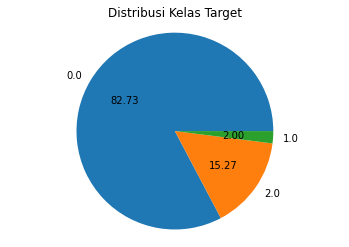

In [17]:
import matplotlib.pyplot as plt

value_counts = target.value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct='%.2f')
plt.title('Distribusi Kelas Target')
plt.axis('equal')
plt.show()

#### **Penyeimbangan jumlah atau proporsi data**

Perbandingan proporsi data tiap target sangat jauh sehingga untuk menghemat waktu komputasi output antar target akan diseimbangkan menggunakan metode UnderSampling. Undersampling adalah teknik untuk mengurangi jumlah data pada kelas mayoritas sehingga jumlahnya setara dengan kelas minoritas.

In [18]:
from imblearn.under_sampling import RandomUnderSampler

smote = RandomUnderSampler()
fitur_seimbang, target_seimbang = smote.fit_resample(fitur, target)

print("Jumlah sampel setelah diseimbangkan : ")
print(target_seimbang.value_counts())

Jumlah sampel setelah diseimbangkan : 
0.0    4593
1.0    4593
2.0    4593
Name: Diabetes_012, dtype: int64


##### **Visualisasi banyaknya data di tiap label**

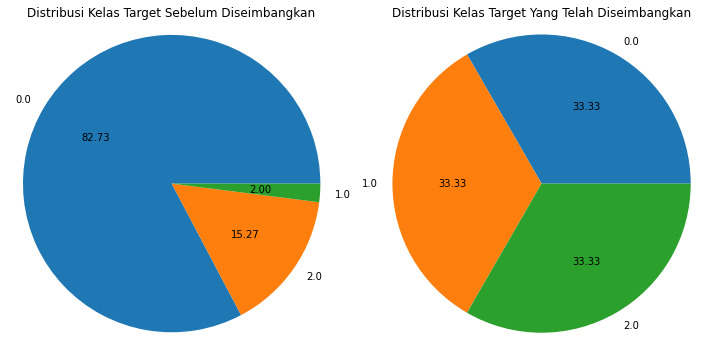

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot distribusi kelas target sebelum penyeimbangan
target_tidak_seimbang = target.value_counts()
axs[0].pie(target_tidak_seimbang, labels=target_tidak_seimbang.index, autopct='%.2f')
axs[0].set_title('Distribusi Kelas Target Sebelum Diseimbangkan')
axs[0].axis('equal')

# Plot distribusi kelas target setelah penyeimbangan
target_sudah_seimbang = target_seimbang.value_counts()
axs[1].pie(target_sudah_seimbang, labels=target_sudah_seimbang.index, autopct='%.2f')
axs[1].set_title('Distribusi Kelas Target Yang Telah Diseimbangkan')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

### **Hasil Preprocessing Data**

simpan data yang telah siap diproses pada file csv baru

In [20]:
import pandas as pd

# Membuat DataFrame dari fitur dan target yang telah seimbang
data_seimbang = pd.concat([fitur_seimbang, target_seimbang], axis=1)

# Menyimpan DataFrame ke dalam file CSV
data_seimbang.to_csv('data_seimbang.csv', index=False)

### **Feature Selection**

Dengan melakukan skoring fitur, kita akan mengetahui yang mana fitur yang penting dan yang tidak. Hal ini dikarenakan tidak semua fitur dapat dijadikan ciri untuk melakukan klasifikasi. Dengan menentukan beberapa ciri terbaik akan menghasilkan akurasi yang sama atau lebih baik dibandingkan dengan menggunakan semua ciri serta menghemat waktu komputasi.  

Skor informasi menggunakan *mutual_info_classif* berguna untuk mengevaluasi seberapa informatif suatu fitur terhadap variabel target. Skoring fitur menggunakan *mutual_info_classif* dapat mengukur seberapa banyak informasi dari variabel independen (fitur) yang terdapat pada variabel dependen (target) dalam dataset. Secara spesifik, skor ini menunjukkan seberapa banyak informasi dari suatu fitur yang dapat membantu dalam memprediksi target. **Semakin tinggi skornya, semakin informatif fitur tersebut terhadap variabel target.**

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur_seimbang, target_seimbang)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")

Fitur 0: HighBP, Skor: 0.05298941377206301
Fitur 1: HighChol, Skor: 0.026110868508256946
Fitur 2: CholCheck, Skor: 0.021066958323086915
Fitur 3: BMI, Skor: 0.03401837691320697
Fitur 4: Smoker, Skor: 0.0
Fitur 5: Stroke, Skor: 0.01638973546803868
Fitur 6: HeartDiseaseorAttack, Skor: 0.007520890486566678
Fitur 7: PhysActivity, Skor: 0.017681842250051982
Fitur 8: Fruits, Skor: 0.0021597572569778123
Fitur 9: Veggies, Skor: 0.0009839386952887885
Fitur 10: HvyAlcoholConsump, Skor: 0.0016632531945526274
Fitur 11: AnyHealthcare, Skor: 0.004099109470156126
Fitur 12: NoDocbcCost, Skor: 0.0
Fitur 13: GenHlth, Skor: 0.06214324638910962
Fitur 14: MentHlth, Skor: 0.006581550243329293
Fitur 15: PhysHlth, Skor: 0.005834598860465334
Fitur 16: DiffWalk, Skor: 0.023852073775164406
Fitur 17: Sex, Skor: 0.003094841371461765
Fitur 18: Age, Skor: 0.02779639956043578
Fitur 19: Education, Skor: 0.00813985540041351
Fitur 20: Income, Skor: 0.023164293310583117


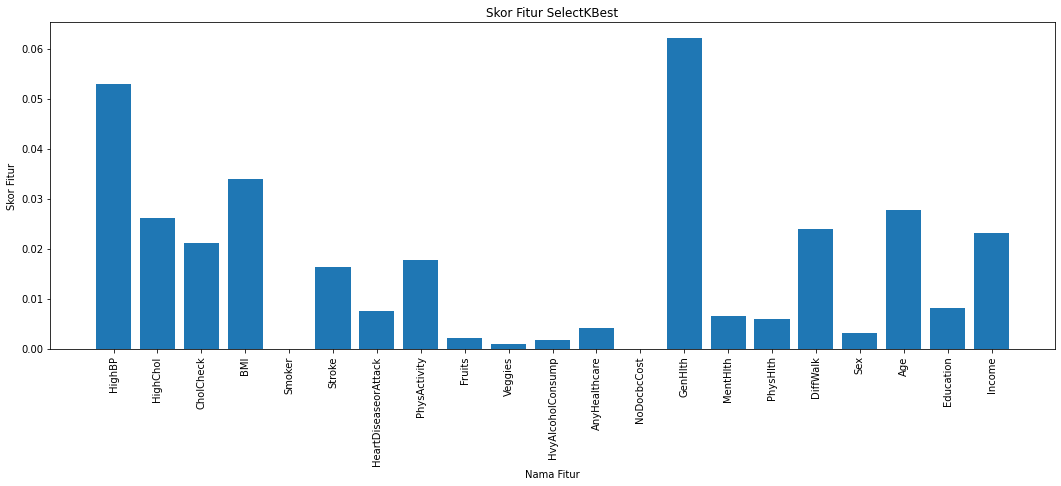

In [22]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
plt.xlabel("Nama Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
plt.xticks(rotation=90)
plt.show()

## MODELLING
---

Note : Model Support Vector Machine dipilih karena memiliki tingkat akurasi yang lebih baik dibandingkan model lainnya. Selengkapnya [disini](https://drive.google.com/drive/folders/1ZfD0-Xe3Cz6LK1wlpbXLkgDIbGQuCq2A?usp=sharing).

### **Load Dataset --------------------------------------------------------------------------------------------------------------------------**

In [2]:
import pandas as pd

dataset = pd.read_csv('dataset_baru.csv')
dataset.head(5)

,HighBP,BMI,GenHlth,Age,Diabetes_012
0,0.0,22.0,2.0,7.0,0.0
1,0.0,26.0,2.0,3.0,0.0
2,0.0,23.0,3.0,11.0,0.0
3,0.0,25.0,2.0,13.0,0.0
4,1.0,20.0,3.0,13.0,0.0


In [3]:
print("Banyaknya data : ", dataset.shape[0])
print("Banyaknya kolom : ", dataset.shape[1])

Banyaknya data :  13419
Banyaknya kolom :  5


### **Split Dataset ---------------------------------------------------------------------------------------------------------------------------**

In [4]:
from sklearn.model_selection import train_test_split

# memisahkan kolom fitur dan target
fitur = dataset.drop(columns=['Diabetes_012'], axis =1)
target = dataset['Diabetes_012']

# melakukan pembagian dataset, dataset dibagi menjadi 80% data training dan 20% data testing
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size = 0.2, random_state=42)

In [5]:
print("Banyaknya fitur atau ciri yang digunakan : ", fitur_train.shape[1])
print("Banyaknya data latih : ", fitur_train.shape[0])
print("Banyaknya data testing : ", fitur_test.shape[0])

Banyaknya fitur atau ciri yang digunakan :  4
Banyaknya data latih :  10735
Banyaknya data testing :  2684


In [6]:
target_train.value_counts()

1.0    3594
2.0    3588
0.0    3553
Name: Diabetes_012, dtype: int64

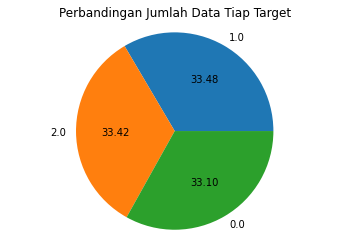

In [7]:
import matplotlib.pyplot as plt

value_counts = target_train.value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct='%.2f')
plt.title('Perbandingan Jumlah Data Tiap Target')
plt.axis('equal')
plt.show()

### **Normalisasi Data ----------------------------------------------------------------------------------------------------------------------**

Normalisasi data adalah proses pengubahan skala dari fitur-fitur dalam dataset sehingga setiap fitur memiliki rentang nilai yang seragam. Normalisasi data bertujuan untuk menghindari kesenjangan besar antara nilai-nilai berbeda dalam dataset serta memungkinkan model pembelajaran mesin untuk bekerja lebih baik.

Z-score normalization merupakan salah satu metode normalisasi yang mana mengubah nilai fitur ke dalam distribusi normal dengan rata-rata 0 dan standar deviasi 1. Rumusnya adalah : 

$$ Z = \frac{(X−μ)}{σ} $$

Keterangan :  
* Z adalah nilai yang telah dinormalisasikan  
* X adalah nilai asli fitur  
* μ adalah rata-rata
* σ adalah standar deviasi dari fitur  

Rumus untuk standar deviasi sendiri sebagai berikut.  
$$ s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n - 1}} $$  

Contoh, disediakan data sebagai berikut. Tentukan nilai hasil normalisasinya  
<table>
    <tr>
    <td>X</td>
    <td>10</td>
    <td>20</td>
    <td>30</td>
    <td>40</td>
    <td>50</td>
    </tr>
    <tr>
    <td>Z</td>
    <td>?</td>
    <td>?</td>
    <td>?</td>
    <td>?</td>
    <td>?</td>
    </tr>
</table>

Diketahui :
* rata - rata
    $$ μ = \sqrt{\frac{\sum_{i=1}^{n}(x_i)}{n}} $$  
    $$ μ = \sqrt{\frac{10+20+30+40+50}{5}} $$  
    $$ μ = 30 $$  

* standar deviasi
    $$ s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n - 1}} $$    
    $$ s = \sqrt{\frac{(10 - 30)^2 + (20 - 30)^2 + (30 - 30)^2 + (40 - 30)^2 + (50 - 30)^2 + }{5 - 1}} $$    
    $$ s = 15.8 $$   

Maka hasil normalisasinya :   
<table>
    <tr>
    <td>X</td>
    <td>10</td>
    <td>20</td>
    <td>30</td>
    <td>40</td>
    <td>50</td>
    </tr>
    <tr>
    <td>Z</td>
    <td>-1.27</td>
    <td>-0.63</td>
    <td>0</td>
    <td>0.63</td>
    <td>1.27</td>
    </tr>
</table>


In [8]:
import pickle
from sklearn.preprocessing import StandardScaler

# menentukan lokasi file pickle akan disimpan
path = 'zscorescaler.pkl'

# membuat dan melatih objek StandardScaler
zscore_scaler = StandardScaler()
zscore_scaler.fit(fitur_train)

# menyimpan model ke dalam file pickle
with open(path, 'wb') as file:
    pickle.dump(zscore_scaler, file)

# memanggil kembali model normalisasi zscore dari file pickle
with open(path, 'rb') as file:
    zscore_scaler = pickle.load(file)

# menerapkan normalisasi zscore pada data training
zscore_training = zscore_scaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
zscore_testing = zscore_scaler.transform(fitur_test)

In [8]:
zscore_scaler

StandardScaler()

### **Membuat model** ------------------------------------------------------------------------------------------------------------------------

#### **Konsep Support Vector Machine**

Support Vector Machine (SVM) adalah sebuah metode klasifikasi dalam pembelajaran mesin yang bertujuan menemukan hyperplane terbaik yang memisahkan label secara optimal dalam ruang fitur yang ada.  

SVM merupakan metode yang mampu  menangani data dengan dimensi tinggi, efektif dalam kasus-kasus di mana jumlah fitur lebih besar dari jumlah sampel data, dan memiliki kinerja yang baik dalam memisahkan kelas yang berbeda secara linier maupun non-linier. Namun, metode ini sangat sensitif dalam pemilihan kernel dan parameter, serta memerlukan waktu komputasi yang cukup tinggi terutama pada dataset yang besar. 

Beberapa konsep penting yang perlu dipahami terkait SVM:
1. Hyperplane: Ini adalah batas keputusan atau pembatas antara dua kelas dalam ruang fitur. Untuk masalah klasifikasi biner, hyperplane adalah garis linear yang memisahkan dua kelas. Namun, dalam dimensi yang lebih tinggi, hyperplane adalah bidang atau hiperbidang.
2. Margin: SVM berupaya untuk menemukan hyperplane yang memiliki margin terbesar, yaitu jarak terdekat antara titik-titik dari kedua kelas dengan hyperplane.
3. Support Vectors: Ini adalah titik-titik data yang paling dekat dengan hyperplane, yang menentukan posisi dan orientasi dari hyperplane. Support vectors adalah titik-titik yang paling kritis dalam menentukan keputusan pembelajaran mesin.
4. Kernel Trick: Kadang-kadang, kelas tidak dapat dipisahkan secara linier di ruang dimensi rendah. Kernel trick memungkinkan SVM menangani masalah ini dengan mentransformasikan data ke dalam dimensi yang lebih tinggi di mana kelas dapat dipisahkan secara linier.


Untuk klasifikasi biner, kita perlu menentukan hyperlane (garis pada dimensi dua atau bidang pada dimensi lebih tinggi). Jika ditemukan data pelatuhan {(x1,y1), (x2,y2), ..., (xn,yn)} di mana xi melambangkan fitur dan yi melambangkan label maka fungsi keputusan sebagai berikut.

$$ f(x) = sign(w . x + b) $$  

Keterangan :
* w : vektor bobot yang sejajar dengan hyperplane
* b : konstanta bias
* ⋅ : produk titik antara vektor w dan x
* sign(⋅) : fungsi tanda untuk mengembalikan 1 jika nilai positif, -1 jika nilai negatif, dan 0 jika nilainya nol.  

Tujuan utama dari SVM adalah menemukan w dan b yang optimal sehingga margin antara hyperplane dan titik terdekat dari kedua kelas adalah maksimum. 

Namun apabila label tersebut dipisahkan secara linear, SVM menggunakan kernel untuk mentransformasi data ke dimensi yang lebih tinggi. Adapun kernel - kernel tersebut yakni.
1. Radial Basis Function (RBF)
2. Polynomial
3. Sigmoid dan lainnya.

Fungsi keputusannya pun menjadi :

$$ f(x) = {\sum_{i=1}^{n}(αiyiK(xi, x)+b)} $$   

Keterangan : 
* K(xi,x) adalah fungsi kernel yang menghitung hasil transformasi kernel antara dua vektor xi dan x.
* αi : koefisien dari vektor pelatihan yang dihitung selama proses pelatihan.
* b  : konstanta bias.  

Dengan memanfaatkan fungsi kernel untuk memproyeksikan data ke ruang fitur yang lebih tinggi, pemisahan yang tidak linear bisa dilakukan

#### **Pencarian Parameter Terbaik**

Pencarian parameter terbaik menggunakan modul GridSearchCVAdapun parameter yang akan diuji yakni.
1. C: Parameter ini mengontrol penalti terhadap kesalahan klasifikasi pada data pelatihan. Semakin tinggi nilai C, semakin besar penalti terhadap kesalahan klasifikasi, yang cenderung menghasilkan batas keputusan yang kompleks dan mungkin terlalu menyesuaikan diri dengan data pelatihan.

2. Gamma: Parameter ini mengontrol seberapa jauh pengaruh satu sampel data. Gamma yang lebih tinggi menyebabkan model memperhitungkan sampel pelatihan yang jauh, yang mungkin menghasilkan batas keputusan yang kompleks, tidak terlalu halus, dan rentan terhadap overfitting.

3. Kernel: Parameter ini menentukan jenis fungsi kernel yang akan digunakan oleh algoritma SVM untuk mengubah data ke ruang fitur yang lebih tinggi. Beberapa kernel yang umum digunakan termasuk linear, polynomial, dan radial basis function (RBF). Kernel yang berbeda akan cocok untuk tipe data yang berbeda.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tentukan parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly']
}

# Inisialisasi model SVM
svm = SVC()

# Buat objek Grid Search dengan model SVM dan parameter grid
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Lakukan grid search pada data latih
grid_search.fit(zscore_training, target_train)

# Melihat parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
accuracy = best_model.score(zscore_testing, target_test)
print("\nAkurasi model terbaik:", accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Parameter terbaik: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Akurasi model terbaik: 0.5208643815201193


#### **Simpan Model**

Model disimpan dalam format .pkl menggunakan modul pickle. Hal ini bertujuan agar jika sewaktu - waktu model ini akan digunakan kembali, cukup membuka model.pkl nya saja

In [12]:
import pickle

# Simpan model terbaik ke dalam file pickle
with open('model_svm.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [13]:
best_model

SVC(C=100, gamma=1)

## EVALUATION
---

Tahap evaluasi merupakan tahap penilaian atas kebenaran data. Melalui tahap ini kita dapat mengetahui seberapa jauh suatu data dapat dipercaya.

In [14]:
with open('model_svm.pkl', 'rb') as file:
    model_svm = pickle.load(file)

from sklearn.metrics import accuracy_score

model_svm.fit(zscore_training, target_train)
y_pred_svm = model_svm.predict(zscore_testing)

### **Akurasi**

**Akurasi** adalah rasio prediksi benar (positif dan negatif) atau True Positif dan True Negative dibandingkan dengan total data.  

$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $

In [15]:
akurasi_svm = accuracy_score(target_test, y_pred_svm)
print('Akurasi Menggunakan Support Vector Machine : ', akurasi_svm)

Akurasi Menggunakan Support Vector Machine :  0.5208643815201193


### **Presisi dan Recall**

* **Presisi** mengukur sejauh mana hasil positif yang diprediksi oleh model adalah benar.  
$Precision = \frac{TP}{TP+FP}$  

* **Recall** mengukur sejauh mana model dapat mengidentifikasi dengan benar semua instance positif dalam data.  
$Recall = \frac{TP}{TP+FN}$

In [16]:
from sklearn.metrics import precision_score, recall_score

# Hitung presisi
precision = precision_score(target_test, y_pred_svm, average='macro')

# Hitung recall
recall = recall_score(target_test, y_pred_svm, average='macro')

print("Presisi :", precision)
print("Recall :", recall)

Presisi : 0.5115540383888001
Recall : 0.5189737673921567


### **F-1 Score**

F1-Score adalah metrik gabungan yang mempertimbangkan presisi dan recall.  
$F1-Score = \frac{2.TP}{2.TP+FP+FN}$

In [17]:
from sklearn.metrics import f1_score

# Hitung f1-score
f1_score = f1_score(target_test, y_pred_svm, average='macro')

print("F1 - Score :", precision)

F1 - Score : 0.5115540383888001


### **Confussion Matrix**

Confusion matrix adalah tabel yang digunakan untuk mengevaluasi kinerja model pada data uji di mana nilai sebenarnya diketahui. Ini menampilkan jumlah hasil prediksi yang benar dan yang salah yang dibuat oleh model secara terperinci.  
 
Confusion matrix terdiri dari empat istilah utama:
1. True Positives (TP): Prediksi positif yang benar, yaitu jumlah sampel positif yang diprediksi dengan benar oleh model.
2. True Negatives (TN): Prediksi negatif yang benar, yaitu jumlah sampel negatif yang diprediksi dengan benar oleh model.
3. False Positives (FP): Kesalahan prediksi di mana model memprediksi positif saat seharusnya negatif, yaitu jumlah sampel negatif yang salah diprediksi sebagai positif.
4. False Negatives (FN): Kesalahan prediksi di mana model memprediksi negatif saat seharusnya positif, yaitu jumlah sampel positif yang salah diprediksi sebagai negatif.

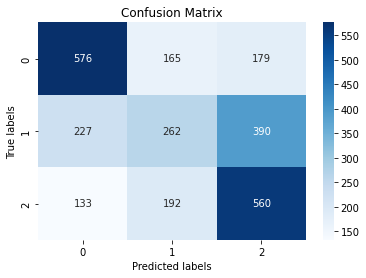

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(target_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Dari matrik di atas, diperoleh informasi sebagai berikut.
* Orang yang tidak diabetes dan diprediksi benar ada 576 data
* Orang prediabetes diprediksi benar ada 262 data
* Orang diabetes diprediksi benar ada 560 data

## DEPLOYMENT
---

code dilanjut pada file main.py untuk membangun sistem